
# Linear Regression Project

Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. We'll figure it out! Let's get started



## Features 
1. Email
2. Address
3. Avatar
4. Avg. Session Length: Average session of in-store style advice sessions
5. Time on App: Average time spent on App in minutes
6. Time on Website: Average time spent on Website in minutes
7. Length of Membership: How many years the customer has been a member




## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data



In [2]:
df = pd.read_csv('Ecommerce Customers')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis



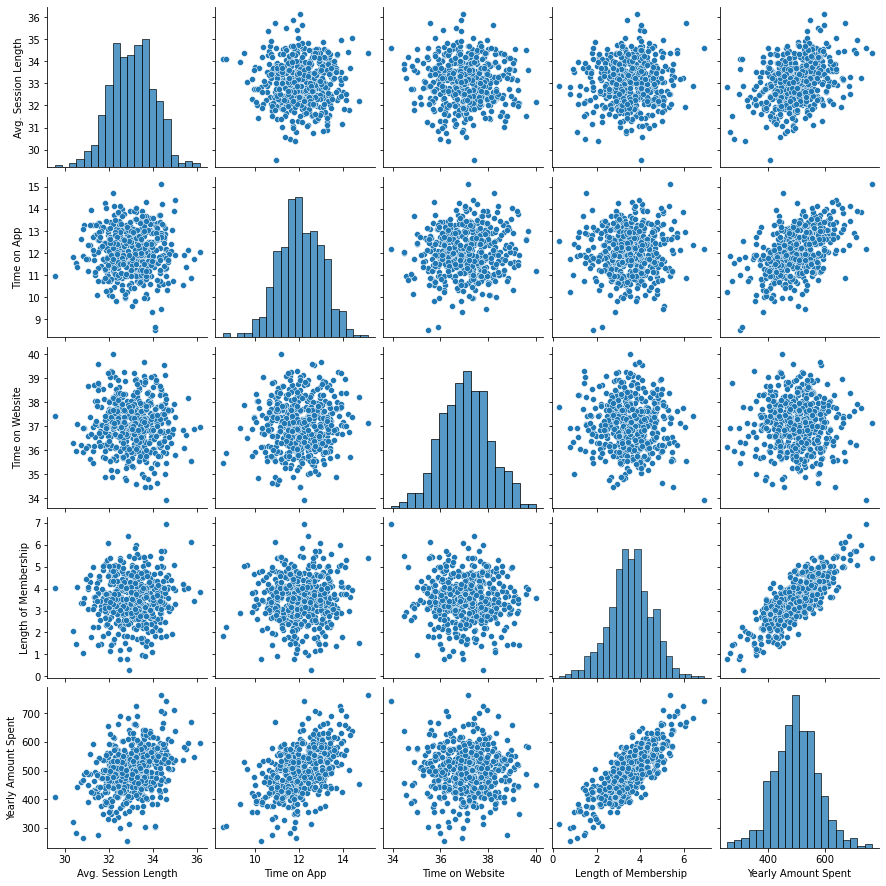

In [6]:
sns.pairplot(df,palette='species')


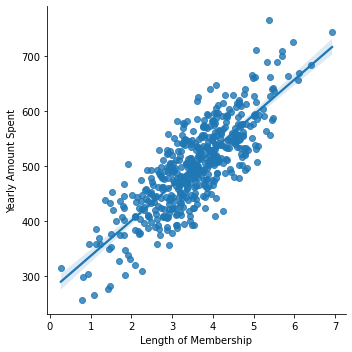

In [7]:
sns.lmplot(x = 'Length of Membership',y = 'Yearly Amount Spent',data=df)


No handles with labels found to put in legend.


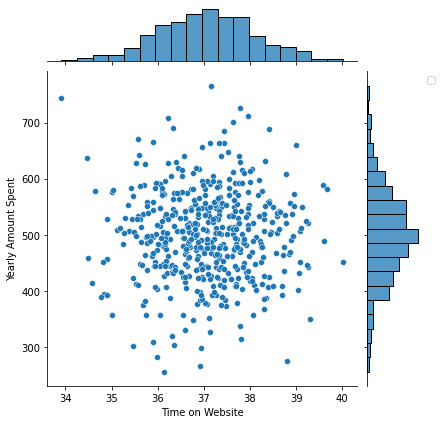

In [8]:
sns.jointplot(data=df,x='Time on Website',y='Yearly Amount Spent')
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))


C:\Users\hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


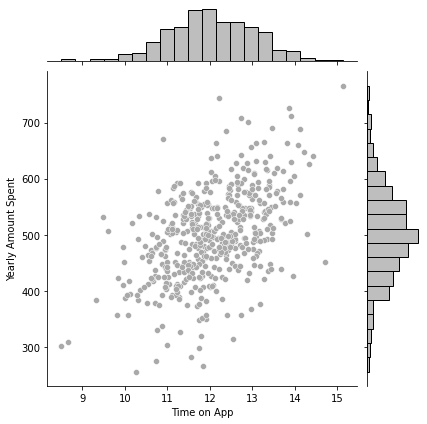

In [9]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'],color='darkgrey')


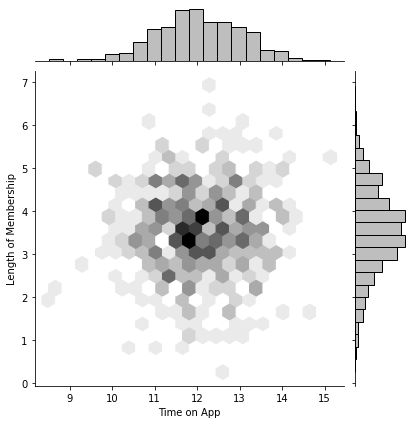

In [10]:
sns.jointplot(data = df,x ='Time on App',y='Length of Membership',color='darkgrey',kind='hex')

## Training and Testing Data



In [11]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [13]:
y = df['Yearly Amount Spent']

In [14]:
# to split the dataset 
from sklearn.model_selection import train_test_split 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, # the features 
                                                    y, # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=101) # for reproducibilty

In [16]:
y_test

18     452.315675
361    401.033135
104    410.069611
4      599.406092
156    586.155870
          ...    
147    479.731938
346    488.387526
423    461.112248
17     407.704548
259    375.398455
Name: Yearly Amount Spent, Length: 150, dtype: float64

## Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Instantiate LinearRegression
lm = LinearRegression()

In [19]:
# Fit model 
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data

In [21]:
# Make predictions
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted values')

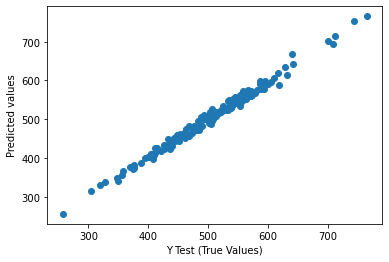

In [22]:
plt.scatter(y_test,predictions) 
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted values')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).


In [23]:
from sklearn import metrics 

In [24]:
mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(metrics.mean_squared_error(y_test,predictions))

In [25]:
print('{} {}'.format('MAE:',mae) )
print('{} {}'.format('MAE:',mse) )
print('{} {}'.format('MAE:',rmse) )

MAE: 7.228148653430853
MAE: 79.81305165097487
MAE: 8.933815066978656


In [26]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

## Residuals




C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

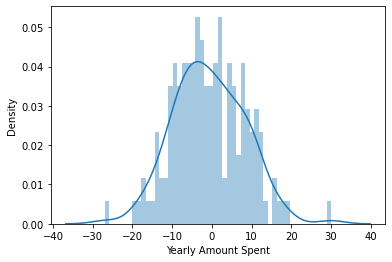

In [27]:
sns.distplot(y_test-predictions,bins=50)


## Conclusion
We still want to figure out the answer to the original question, do we focus our effort on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.



In [28]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeffecient'])

In [29]:
cdf 

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
